In [156]:
#pip install torch torchvision tensorboard skorch pytorch_lightning pandas numpy


# Data Description

**Customer ID**: Customer Unique Identifier

**Gender**: Male/Female

**SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)

**Partner**:Whether the customer has a partner or not (Yes, No)

**Dependents**: Whether the customer has dependents or not (Yes, No)

**Tenure**: Number of months the customer has stayed with the company

**PhoneService**: Whether the customer has a phone service or not (Yes, No)

**MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)

**InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)

**OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)

**OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)

**DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)

**TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)

**StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)

**StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)

**Contract**: The contract term of the customer (Month-to-month, One year, Two year)

**PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)

**PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)

**MonthlyCharges**: The amount charged to the customer monthly

**TotalCharges**: The total amount charged to the customer

**Churn**: Whether the customer churned or not (Yes or No)


In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)



In [158]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [159]:
df.shape

(7043, 21)

In [160]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [162]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [163]:
df['TotalCharges']=df['TotalCharges'].replace(' ', np.nan).astype(float)
df['MonthlyCharges']=df['MonthlyCharges'].replace(' ',np.nan).astype(float)
df['tenure']=df['tenure'].replace(' ',np.nan).astype(float)
# set customerid as index
df.set_index('customerID', inplace=True)

In [164]:
categorical_features = ["gender", "SeniorCitizen", "Partner", 
                        "Dependents", "PhoneService", "MultipleLines", "InternetService", 
                        "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
                        "TechSupport", "StreamingTV", "StreamingMovies", 
                        "Contract", "PaperlessBilling", "PaymentMethod"]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]

In [165]:
# Mapping the target variable to 0 and 1
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [166]:
# CHI SQUARE TEST categorical variables calculation p values
from scipy.stats import chi2_contingency
# Create an empty list to store the p-values
p_values = []
# Iterate over the categorical variables and print  values
for variable in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(df["Churn"], df[variable])
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Append the p-value to the list
    p_values.append(p)
# Create a DataFrame with the p-values
p_values_df = pd.DataFrame({"Variable": categorical_features, "P-value": p_values})
# Print the DataFrame
print(p_values_df)




            Variable        P-value
0             gender   4.865787e-01
1      SeniorCitizen   1.510067e-36
2            Partner   2.139911e-36
3         Dependents   4.924922e-43
4       PhoneService   3.387825e-01
5      MultipleLines   3.464383e-03
6    InternetService  9.571788e-160
7     OnlineSecurity  2.661150e-185
8       OnlineBackup  2.079759e-131
9   DeviceProtection  5.505219e-122
10       TechSupport  1.443084e-180
11       StreamingTV   5.528994e-82
12   StreamingMovies   2.667757e-82
13          Contract  5.863038e-258
14  PaperlessBilling   4.073355e-58
15     PaymentMethod  3.682355e-140


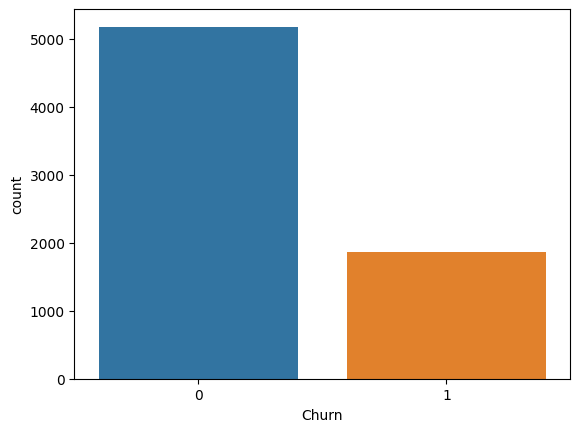

In [167]:
# Target variable distribution check for imblance
sns.countplot(x='Churn', data=df)
plt.show()

Imbalance present undersample minority class

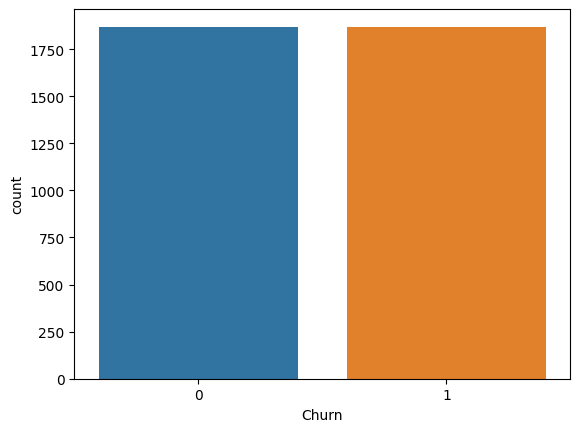

In [168]:
# undersampling majority class to balance the target variable random undersampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_resampled, y_resampled = rus.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled], axis=1)
sns.countplot(x='Churn', data=df)
plt.show()


In [169]:
# Split data into train, validation and test sets
from sklearn.model_selection import train_test_split
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0, stratify=y_train)


In [170]:
X_train.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7893-IXHRQ,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.55,20.55


In [171]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define the transformer for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define the transformer for categorical features (without dropping the first dummy)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore',drop='first'))  
])

# Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply transformation to X_train
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Get the column names of the preprocessed arrays
new_numerical_features = numerical_features
new_categorical_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()

columns_transformed = new_numerical_features + list(new_categorical_features)

# Creating DataFrames from the preprocessed arrays
X_train = pd.DataFrame(X_train_preprocessed, columns=columns_transformed, index=X_train.index)

# Apply transformation to X_test
X_test_preprocessed = preprocessor.transform(X_test)
X_test = pd.DataFrame(X_test_preprocessed, columns=columns_transformed, index=X_test.index)

# Apply transformation to X_val
X_val_preprocessed = preprocessor.transform(X_val)
X_val = pd.DataFrame(X_val_preprocessed, columns=columns_transformed, index=X_val.index)

In [177]:
X_train.head(1)

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7893-IXHRQ,-1.114448,-1.654314,-0.931556,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [179]:
# drop missing values
X_train.dropna(inplace=True)
X_val.dropna(inplace=True)
X_test.dropna(inplace=True)
# y_train drop missing values
y_train = y_train.loc[X_train.index]
y_val = y_val.loc[X_val.index]
y_test = y_test.loc[X_test.index]
  

In [ ]:
# X_train, X_val, X_test, y_train, y_val, y_test

In [180]:
# target variable 
y_train.value_counts(), y_val.value_counts(), y_test.value_counts()

(1    1196
 0    1194
 Name: Churn, dtype: int64,
 1    299
 0    298
 Name: Churn, dtype: int64,
 1    374
 0    373
 Name: Churn, dtype: int64)

Model Building

In [181]:
X_train.shape

(2390, 30)

Architecture 1

Step 1: Convert the Processed DataFrames to PyTorch Datasets


In [203]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools
import torch.nn.functional as F

# Neural network architecture definition
class FeedForwardNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, activation, dropout_rate):
        super(FeedForwardNN, self).__init__()
        # Define the layers in the network
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # First linear layer
        self.fc2 = nn.Linear(hidden_dim, hidden_dim) # Second linear layer
        self.fc3 = nn.Linear(hidden_dim, hidden_dim) # Third linear layer
        self.fc4 = nn.Linear(hidden_dim, output_dim) # Output layer
        self.activation = activation  # Activation function for hidden layers
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer

        # Initialize weights using Xavier uniform initialization
        init.xavier_uniform_(self.fc1.weight)
        init.xavier_uniform_(self.fc2.weight)
        init.xavier_uniform_(self.fc3.weight)
        init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        # Define the forward pass
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.dropout(x)
        x = self.activation(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))  # Sigmoid activation for output layer
        return x

# Function to train the model
def train_model(model, criterion, optimizer, X_train, y_train, num_epochs=10):
    model.train()  # Set model to training mode
    for epoch in range(num_epochs):
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(X_train)
        loss = criterion(outputs.squeeze(), y_train)  # Compute loss
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update weights

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        outputs = model(X_test)
        predicted_labels = torch.round(outputs).squeeze().detach().numpy()
        accuracy = accuracy_score(y_test, predicted_labels)
        precision = precision_score(y_test, predicted_labels)
        recall = recall_score(y_test, predicted_labels)
        f1 = f1_score(y_test, predicted_labels)
    return accuracy, precision, recall, f1

# Define hyperparameter space
hidden_dim_list = [32, 64, 128]  # List of hidden layer sizes
learning_rate_list = [0.001, 0.01, 0.1]  # List of learning rates
activation_list = [nn.ReLU(), nn.Tanh(), nn.LeakyReLU(), nn.ELU()]  # List of activation functions
dropout_list = [0.0, 0.2, 0.5]  # List of dropout rates
optimizer_list = [optim.Adam, optim.SGD, optim.RMSprop, optim.Adagrad, optim.Adadelta, optim.Adamax, optim.ASGD, optim.Rprop, optim.AdamW]  # List of optimizers
num_epochs_list = [10, 20, 30]  # List of epoch numbers
batch_size_list = [16, 32, 64]  # List of batch sizes
hyperparameter_space = itertools.product(hidden_dim_list, learning_rate_list, activation_list, dropout_list, optimizer_list, num_epochs_list,batch_size_list)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

best_model = None
best_f1 = 0.0
best_metrics = {}

# Iterate over the hyperparameter space
for hidden_dim, learning_rate, activation, dropout_rate, optimizer, num_epochs,batch_size in hyperparameter_space:
    model = FeedForwardNN(input_dim=X_train.shape[1], hidden_dim=hidden_dim, output_dim=1, activation=activation, dropout_rate=dropout_rate)
    criterion = nn.BCELoss()  # Binary cross-entropy loss for binary classification
    optimizer = optimizer(model.parameters(), lr=learning_rate)  # Initialize optimizer

    # Train the model
    train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor, num_epochs)

    # Evaluate the model on the validation set
    accuracy, precision, recall, f1 = evaluate_model(model, X_val_tensor, y_val_tensor)

    # Update the best model if necessary
    if f1 > best_f1:
        best_f1 = f1
        best_metrics = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
        best_model = model
        # Store best hyperparameters
        best_hidden_dim = hidden_dim
        best_learning_rate = learning_rate
        best_activation = activation
        best_dropout_rate = dropout_rate
        best_optimizer = optimizer
        best_num_epochs = num_epochs

# Evaluate the best model on the test set
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(best_model, X_test_tensor, y_test_tensor)

# Output the best hyperparameters
print("Best Hyperparameters:")
print(f"Hidden Dimension: {best_hidden_dim}")
print(f"Learning Rate: {best_learning_rate}")
print(f"Activation: {best_activation}")
print(f"Dropout Rate: {best_dropout_rate}")
print(f"Optimizer: {best_optimizer}")
print(f"Number of Epochs: {best_num_epochs}")

# Print evaluation metrics of the best model for the validation set
print("Validation Set Metrics (Best Model):")
print(f"Accuracy: {best_metrics['accuracy']:.4f}")
print(f"Precision: {best_metrics['precision']:.4f}")
print(f"Recall: {best_metrics['recall']:.4f}")
print(f"F1-Score: {best_metrics['f1']:.4f}")

# Print evaluation metrics of the best model for the test set
print("\nTest Set Metrics (Best Model):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")


c:\Users\tashf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tashf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tashf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tashf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

Best Hyperparameters:
Hidden Dimension: 64
Learning Rate: 0.001
Activation: LeakyReLU(negative_slope=0.01)
Dropout Rate: 0.0
Optimizer: RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    weight_decay: 0
)
Number of Epochs: 30
Validation Set Metrics (Best Model):
Accuracy: 0.7437
Precision: 0.6952
Recall: 0.8696
F1-Score: 0.7727

Test Set Metrics (Best Model):
Accuracy: 0.7657
Precision: 0.7375
Recall: 0.8262
F1-Score: 0.7793


Architecture 2

In [205]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as kaiming_init
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools
import torch.nn.functional as F

# Define the modified neural network architecture
class FeedForwardNN_Modified(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, activation, dropout_rate):
        super(FeedForwardNN_Modified, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)  # Additional hidden layer
        self.fc5 = nn.Linear(hidden_dim, hidden_dim)  # Additional hidden layer
        self.fc6 = nn.Linear(hidden_dim, output_dim)
        self.activation = activation
        self.dropout = nn.Dropout(dropout_rate)

        # Initialize weights using He (Kaiming) uniform initialization
        kaiming_init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')
        kaiming_init.kaiming_uniform_(self.fc2.weight, nonlinearity='relu')
        kaiming_init.kaiming_uniform_(self.fc3.weight, nonlinearity='relu')
        kaiming_init.kaiming_uniform_(self.fc4.weight, nonlinearity='relu')
        kaiming_init.kaiming_uniform_(self.fc5.weight, nonlinearity='relu')
        kaiming_init.kaiming_uniform_(self.fc6.weight, nonlinearity='relu')

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.dropout(x)
        x = self.activation(self.fc3(x))
        x = self.dropout(x)
        x = self.activation(self.fc4(x))  # Activation for the new layer
        x = self.dropout(x)
        x = self.activation(self.fc5(x))  # Activation for the new layer
        x = torch.sigmoid(self.fc6(x))  # Sigmoid activation for output layer
        return x

# Custom hinge loss with L2 penalty term
def custom_hinge_loss(outputs, labels, penalty_term):
    hinge_loss = torch.mean(torch.clamp(1 - outputs * labels, min=0))  # Basic hinge loss calculation
    return hinge_loss + penalty_term * torch.sum(torch.pow(outputs, 2))  # Adding L2 penalty term

# Function to train the model
def train_model(model, criterion, optimizer, X_train, y_train, num_epochs=10):
    model.train()  # Set model to training mode
    for epoch in range(num_epochs):
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(X_train)
        loss = criterion(outputs.squeeze(), y_train)  # Compute loss
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update weights

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        outputs = model(X_test)
        predicted_labels = torch.round(outputs).squeeze().detach().numpy()
        accuracy = accuracy_score(y_test, predicted_labels)
        precision = precision_score(y_test, predicted_labels)
        recall = recall_score(y_test, predicted_labels)
        f1 = f1_score(y_test, predicted_labels)
    return accuracy, precision, recall, f1

# Hyperparameter space definition
hidden_dim_list = [32, 64, 128]
learning_rate_list = [0.001, 0.01, 0.1]
activation_list = [nn.ReLU(), nn.Tanh(), nn.LeakyReLU(), nn.ELU()]
dropout_list = [0.0, 0.2, 0.5]
optimizer_list = [optim.Adam, optim.SGD, optim.RMSprop, optim.Adagrad, optim.Adadelta, optim.Adamax, optim.ASGD, optim.Rprop, optim.AdamW]
num_epochs_list = [10, 20, 30]
batch_size_list = [16, 32, 64]  # List of batch sizes

hyperparameter_space = itertools.product(hidden_dim_list, learning_rate_list, activation_list, dropout_list, optimizer_list, num_epochs_list, batch_size_list)

# Convert data to PyTorch tensors (assuming X_train, X_val, X_test, y_train, y_val, y_test are already defined)
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

best_model = None
best_f1 = 0.0
best_metrics = {}

# Iterate over the hyperparameter space
for hidden_dim, learning_rate, activation, dropout_rate, optimizer_class, num_epochs,batch_size in hyperparameter_space:
    model = FeedForwardNN_Modified(input_dim=X_train.shape[1], hidden_dim=hidden_dim, output_dim=1, activation=activation, dropout_rate=dropout_rate)
    criterion = lambda outputs, labels: custom_hinge_loss(outputs, labels, penalty_term=0.01)  # Set penalty term for L2 regularization
    optimizer = optimizer_class(model.parameters(), lr=learning_rate)

    # Train the model with specified number of epochs
    train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor, num_epochs)

    # Evaluate the model on the validation set
    accuracy, precision, recall, f1 = evaluate_model(model, X_val_tensor, y_val_tensor)

    # Update the best model if necessary
    if f1 > best_f1:
        best_f1 = f1
        best_metrics = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
        best_model = model
        best_hidden_dim = hidden_dim
        best_learning_rate = learning_rate
        best_activation = activation
        best_dropout_rate = dropout_rate
        best_optimizer = optimizer_class
        best_num_epochs = num_epochs

# Evaluate the best model on the test set
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(best_model, X_test_tensor, y_test_tensor)

# Output the best hyperparameters
print("Best Hyperparameters:")
print(f"Hidden Dimension: {best_hidden_dim}")
print(f"Learning Rate: {best_learning_rate}")
print(f"Activation: {best_activation}")
print(f"Dropout Rate: {best_dropout_rate}")
print(f"Optimizer: {best_optimizer}")
print(f"Number of Epochs: {best_num_epochs}")

# Print evaluation metrics of the best model for the validation set
print("Validation Set Metrics (Best Model):")
print(f"Accuracy: {best_metrics['accuracy']:.4f}")
print(f"Precision: {best_metrics['precision']:.4f}")
print(f"Recall: {best_metrics['recall']:.4f}")
print(f"F1-Score: {best_metrics['f1']:.4f}")

# Print evaluation metrics of the best model for the test set
print("\nTest Set Metrics (Best Model):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")


c:\Users\tashf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tashf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tashf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tashf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

Best Hyperparameters:
Hidden Dimension: 32
Learning Rate: 0.001
Activation: ReLU()
Dropout Rate: 0.2
Optimizer: <class 'torch.optim.adagrad.Adagrad'>
Number of Epochs: 30
Validation Set Metrics (Best Model):
Accuracy: 0.6013
Precision: 0.5604
Recall: 0.9465
F1-Score: 0.7040

Test Set Metrics (Best Model):
Accuracy: 0.5743
Precision: 0.5433
Recall: 0.9385
F1-Score: 0.6882


c:\Users\tashf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
